## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [2]:
df = pd.read_csv('housing.csv')
housing = df.dropna().reset_index().copy()
housing = pd.get_dummies(housing, drop_first=True).astype(int)
housing.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,-122,37,41,880,129,322,126,8,452600,0,0,1,0
1,1,-122,37,21,7099,1106,2401,1138,8,358500,0,0,1,0
2,2,-122,37,52,1467,190,496,177,7,352100,0,0,1,0
3,3,-122,37,52,1274,235,558,219,5,341300,0,0,1,0
4,4,-122,37,52,1627,280,565,259,3,342200,0,0,1,0


In [18]:
X = housing.drop(columns='median_house_value')
y = housing.loc[:, 'median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

clf = DecisionTreeRegressor(max_depth=4)

clf.fit(X_train, y_train)

predict = clf.predict(X_train)
R2 = clf.score(X_train, y_train)
mse = mean_squared_error(y_train, predict)
print(f'MSE: {mse}')
print(f'R²: {R2}')

MSE: 5307680040.6282425
R²: 0.6010494615422384


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [20]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 1.70388328e+07, 2.19079686e+07, 2.23465611e+07,
        3.28590098e+07, 4.44987367e+07, 7.35656253e+07, 8.98452384e+07,
        1.01568262e+08, 1.37502091e+08, 1.68481886e+08, 2.13618017e+08,
        5.01360071e+08, 7.93939632e+08, 1.64375773e+09, 4.13413577e+09]),
 'impurities': array([5.30768004e+09, 5.32471887e+09, 5.34662684e+09, 5.36897340e+09,
        5.40183241e+09, 5.44633115e+09, 5.51989677e+09, 5.60974201e+09,
        5.71131027e+09, 5.84881237e+09, 6.01729425e+09, 6.23091227e+09,
        6.73227234e+09, 7.52621197e+09, 9.16996970e+09, 1.33041055e+10])}

In [22]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

print(f'CCP_Alphas: {ccp_alphas}')
print(f'Impurities: {impurities}')

CCP_Alphas: [0.00000000e+00 1.70388328e+07 2.19079686e+07 2.23465611e+07
 3.28590098e+07 4.44987367e+07 7.35656253e+07 8.98452384e+07
 1.01568262e+08 1.37502091e+08 1.68481886e+08 2.13618017e+08
 5.01360071e+08 7.93939632e+08 1.64375773e+09 4.13413577e+09]
Impurities: [5.30768004e+09 5.32471887e+09 5.34662684e+09 5.36897340e+09
 5.40183241e+09 5.44633115e+09 5.51989677e+09 5.60974201e+09
 5.71131027e+09 5.84881237e+09 6.01729425e+09 6.23091227e+09
 6.73227234e+09 7.52621197e+09 9.16996970e+09 1.33041055e+10]


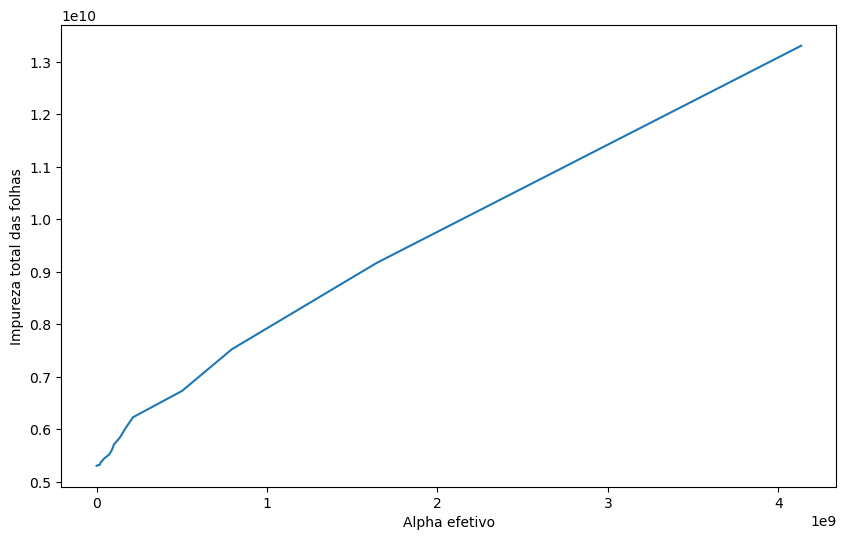

In [30]:
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, impurities)
plt.xlabel('Alpha efetivo')
plt.ylabel('Impureza total das folhas')
plt.show()

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [32]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(ccp_alpha=ccp_alpha, random_state=100)
    clf.fit(X_train, y_train)
    clfs.append(clf)

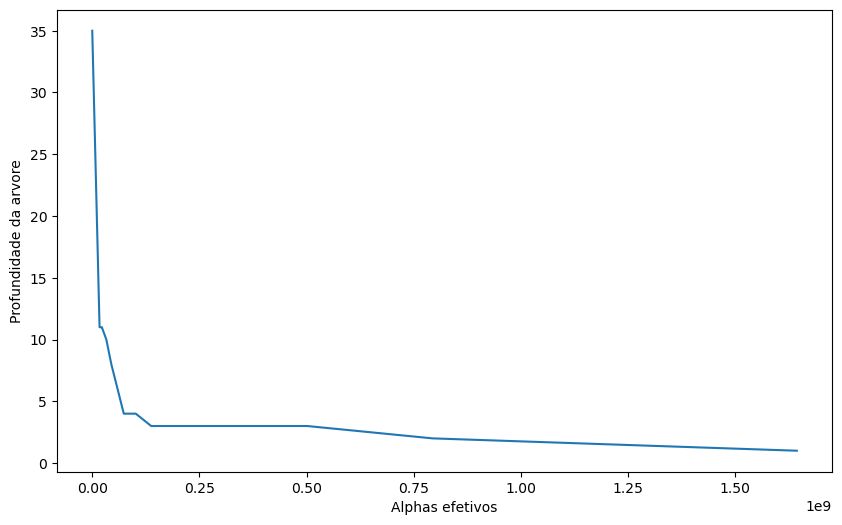

In [36]:
tree_depth = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas[:-1], tree_depth[:-1])
plt.xlabel('Alphas efetivos')
plt.ylabel('Profundidade da arvore')
plt.show()

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [58]:
train_mse = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
test_mse = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]
test_mse

[5141712518.811117,
 4658654866.024623,
 4726908288.001812,
 4737176882.15255,
 4883532481.510679,
 4993672238.725427,
 5559907802.609809,
 5624704817.253809,
 5624704817.253809,
 5942122133.622763,
 5942122133.622763,
 6275444403.190221,
 6275444403.190221,
 6775538024.838413,
 9286066636.503695,
 9286066636.503695]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]

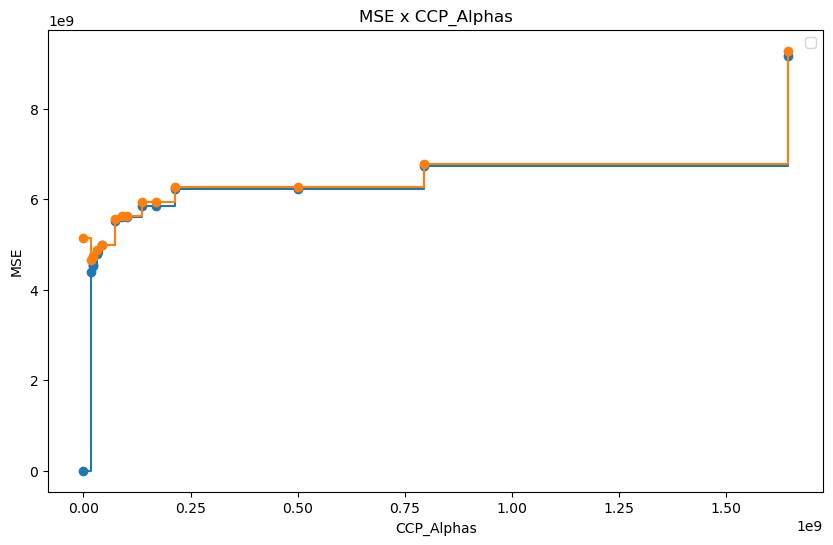

In [56]:
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas[:-1], train_mse[:-1], marker='o', drawstyle='steps-post')
plt.plot(ccp_alphas[:-1], test_mse[:-1], marker='o', drawstyle='steps-post')
plt.title('MSE x CCP_Alphas')
plt.xlabel('CCP_Alphas')
plt.ylabel('MSE')
plt.legend()
plt.plot()


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [60]:
r2 = clfs[1].score(X_test, y_test)
r2

0.6519905558814538

### 7. Visualize esta árvore.

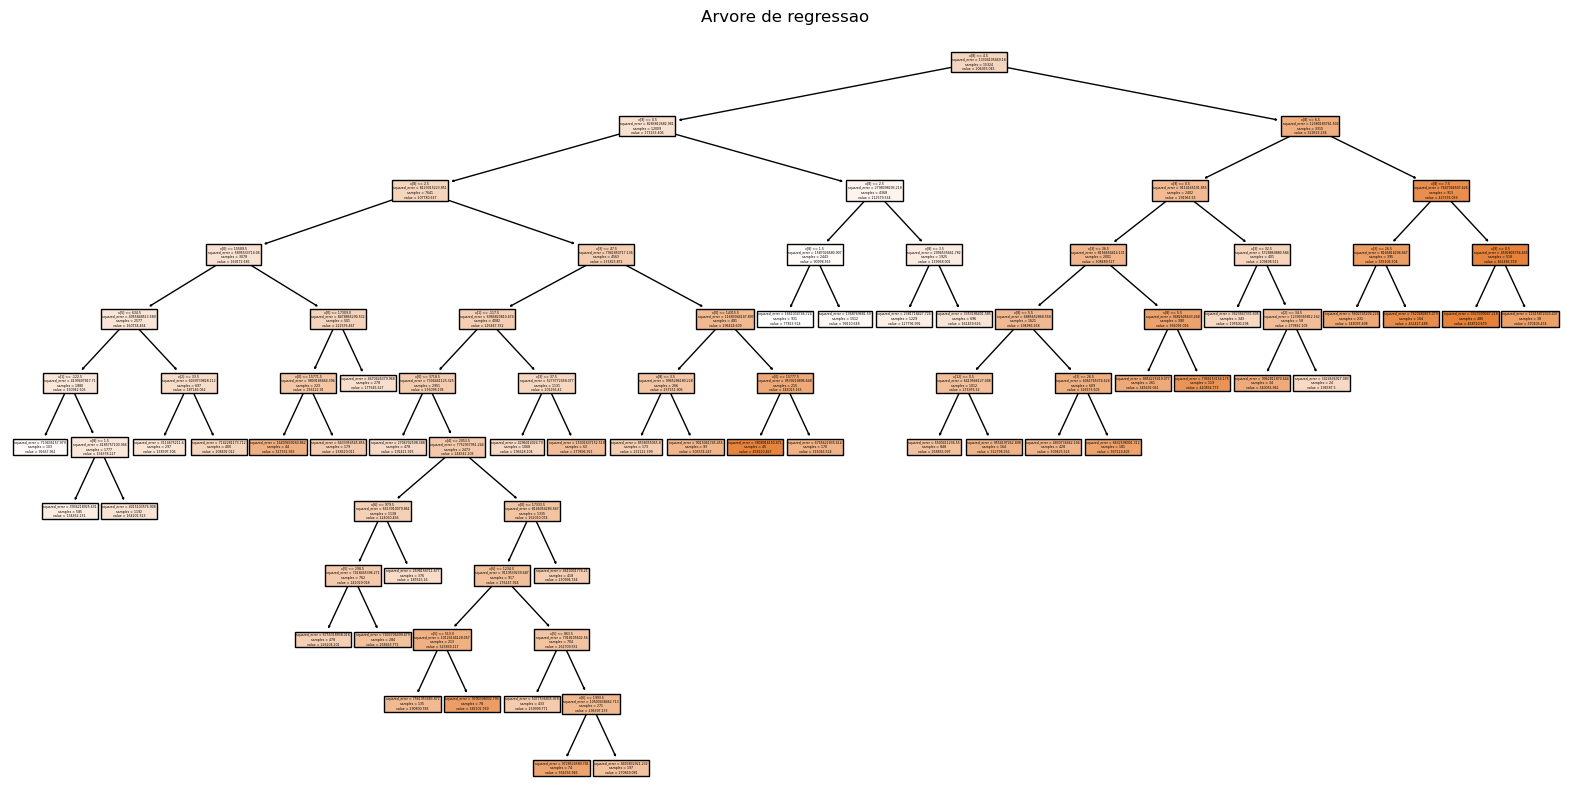

In [66]:
plt.figure(figsize=(20,10))
tree.plot_tree(clfs[1], filled=True)
plt.title('Arvore de regressao')
plt.show()